<a href="https://www.kaggle.com/code/pushkarpradhan/vendnexus?scriptVersionId=282829167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🤖 VendNexus 

## Intelligent Business Intelligence System for Vending Operations

---

### **Transform Your Vending Business with AI-Powered Insights**

**VendNexus Google AI** is a cutting-edge multi-agent AI system designed to revolutionize how vending machine operators manage their business. Powered by Google's Gemini AI, it combines:

✨ **Local Intelligence** - Real-time inventory, sales, and customer management  
🌍 **Global Insights** - Web-powered business trends and market intelligence  
🤝 **Seamless Integration** - Multiple AI agents working in perfect harmony  
📊 **Actionable Recommendations** - Data-driven decisions for your business growth  

---

### **What You Can Do**

- **Manage Inventory** - Track stock levels, get low-stock alerts, optimize supply chain
- **Track Sales** - Monitor revenue, analyze product performance, visualize trends
- **Assist Customers** - Quick purchase assistance and transaction management
- **Generate Insights** - Ask VendNexus Google AI anything about business trends and market opportunities
- **Make Decisions** - Get AI-powered recommendations based on real-time data and global intelligence

---

### **Why VendNexus Google AI?**

| Feature | Benefit |
|---------|---------|
| **Multi-Agent Architecture** | Different specialized agents handle different tasks efficiently |
| **Google Gemini Integration** | Access to latest business trends and market intelligence |
| **Real-Time Monitoring** | Instant alerts and performance metrics |
| **Scalable Design** | Works for single or multiple vending machines |
| **User-Friendly Interface** | Simple commands and intuitive interactions |
| **Data-Driven Decisions** | Reports and analytics to guide your business strategy |

---

*Built with ❤️ for Vending Business Owners | Powered by Google Gemini AI*

---


**# 🧾 VendNexus — AI Multi-Agent Vending System

**VendNexus** is an AI-powered multi-agent vending system with:
- Inventory Manager (agent)
- Customer Assistant (agent)
- Sales Analyst (agent)
- Owner AI (agent)
- **Gemini AI** (new) — natural language business assistant

Features:
- Persistent storage (CSV)
- Low-stock alerts
- Interactive widgets UI
- Revenue graphs
- Gemini-powered business insights**

**Commands of every agents:**

| 📦 Inventory Manager | 🛍️ Customer Assistant | 📊 Sales Analyst | 👨‍💼 Owner AI |
|---|---|---|---|
| `show inventory` | `I want sprite` | `show sales` | `give summary` |
| `add sprite price 30 stock 20` | `check sprite` | `show graph` | `show metrics` |
| `update sprite stock 50` | `show products` | `show revenue` | `recommendations` |
| `delete coke` | `I want 2 sprites and 1 coke` | `analyze products` | `financial analysis` |


In [1]:
# =========================================================
# Imports & Persistence
# =========================================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import networkx as nx
from IPython.display import display, clear_output, Markdown, HTML, Image

# Filenames (in working directory)
INV_FILE = "inventory.csv"
SALES_FILE = "sales.csv"

# Load or create inventory
if os.path.exists(INV_FILE):
    inventory = pd.read_csv(INV_FILE)
else:
    inventory = pd.DataFrame([
        {"product": "Coke", "price": 40, "stock": 10},
        {"product": "Pepsi", "price": 35, "stock": 15},
        {"product": "Water", "price": 20, "stock": 25},
    ])
    inventory.to_csv(INV_FILE, index=False)

# Load or create sales
if os.path.exists(SALES_FILE):
    sales = pd.read_csv(SALES_FILE)
else:
    sales = pd.DataFrame(columns=["product", "qty", "total"])
    sales.to_csv(SALES_FILE, index=False)

def save_data():
    """Persist inventory and sales to CSV."""
    inventory.to_csv(INV_FILE, index=False)
    sales.to_csv(SALES_FILE, index=False)

print("✅ System Loaded. Inventory and Sales data ready.")

✅ System Loaded. Inventory and Sales data ready.


**## ⚠️ Low Stock Alert System

This module shows items that are at or below a configurable threshold.**

In [2]:
# =========================================================
# Low-stock alert functions (Kaggle-safe)
# =========================================================
LOW_STOCK_LIMIT = 5  # change as needed

def get_low_stock_items():
    return inventory[inventory["stock"] <= LOW_STOCK_LIMIT]

def show_low_stock_alerts_df(df):
    """Return DataFrame of low-stock items (helper)."""
    return df[df["stock"] <= LOW_STOCK_LIMIT]

def alert_ui_safe(inventory_df):
    """
    Safe interactive low-stock UI:
    - uses widgets only (no IPython Markdown objects inside widget containers)
    - keeps button visible; updates only output area
    """
    output_alerts = widgets.Output()
    title = widgets.Label(value="🔔 VendNexus 1.0— Notification Panel")
    btn = widgets.Button(description="Check Low Stock", button_style='warning')

    def on_click(b):
        with output_alerts:
            output_alerts.clear_output(wait=True)
            low = show_low_stock_alerts_df(inventory_df)
            if low.empty:
                display(HTML("<b>✅ All items have sufficient stock!</b>"))
            else:
                display(HTML("<b>⚠️ Low Stock Items:</b>"))
                display(low)

    btn.on_click(on_click)
    display(widgets.VBox([title, btn, output_alerts]))

In [3]:
# =========================================================
# 4 Core Agents (Inventory, Sales, Customer, Owner)
# =========================================================

def assistant_inventory(query):
    """Inventory Manager Agent - small natural language command parser."""
    global inventory
    q = str(query).lower().strip()

    if "show" in q or "list" in q:
        return inventory

    if "add" in q:
        try:
            parts = q.split()
            name_idx = parts.index("add") + 1
            price_idx = parts.index("price") + 1
            stock_idx = parts.index("stock") + 1
            name = parts[name_idx].capitalize()
            price = int(parts[price_idx])
            stock = int(parts[stock_idx])
            inventory.loc[len(inventory)] = [name, price, stock]
            save_data()
            return f"✅ Added {name} (price ₹{price}, stock {stock})"
        except Exception:
            return "❌ Error. Format: `add <name> price <num> stock <num>`"

    if "delete" in q:
        name = q.replace("delete", "").strip().lower()
        if inventory['product'].str.lower().eq(name).any():
            inventory = inventory[inventory["product"].str.lower() != name]
            save_data()
            return f"🗑 Deleted {name}"
        return "Item not found."

    return "Inventory Manager: use `show`, `add`, or `delete`."

def assistant_sales(query):
    """Sales Analyst Agent"""
    q = str(query).lower()
    if "graph" in q or "plot" in q:
        if sales.empty:
            return "No sales data to graph yet."
        plt.figure(figsize=(6,3))
        sales.groupby("product")["total"].sum().plot(kind='bar')
        plt.title("Total Revenue by Product")
        plt.ylabel("Revenue (₹)")
        plt.tight_layout()
        plt.show()
        return "📈 Revenue graph displayed."
    if "show" in q:
        return sales if not sales.empty else "No sales yet."
    return "Sales Analyst: use `show sales` or `show graph`."

def assistant_customer(query):
    """Customer Assistant - attempts to match product names in query and sell 1 unit."""
    global inventory, sales
    q = str(query).lower()

    for idx, row in inventory.iterrows():
        p_name = row['product']
        if p_name.lower() in q:
            if row["stock"] <= 0:
                return f"Sorry, {p_name} is out of stock."
            inventory.at[idx, "stock"] -= 1
            price = row["price"]
            new_sale = {"product": p_name, "qty": 1, "total": price}
            sales.loc[len(sales)] = new_sale.values()
            save_data()
            return f"🛒 You purchased {p_name} for ₹{price}."
    return "Customer Assistant: say what you want to buy (e.g., 'I want Coke')."

def assistant_owner(query):
    """Simple Owner AI (non-Gemini): summary and stock view"""
    q = str(query).lower()
    if "summary" in q:
        total_sales = sales["total"].sum() if not sales.empty else 0
        total_qty = sales["qty"].sum() if not sales.empty else 0
        return f"Owner Summary:\n- Total Revenue: ₹{total_sales}\n- Items Sold: {total_qty}"
    if "stock" in q:
        return inventory
    return "Owner AI: ask for `summary` or `stock`."

**## 🖥 Interactive UI

Select an assistant from the dropdown, type a command and click **Run Command**.**

In [4]:
# =========================================================
# Interactive UI for the 4 built-in agents
# =========================================================
agent_options = {
    "Inventory Manager": assistant_inventory,
    "Sales Analyst": assistant_sales,
    "Customer Assistant": assistant_customer,
    "Owner AI": assistant_owner,
}

agent_dropdown = widgets.Dropdown(options=list(agent_options.keys()), description="Assistant:")
input_box = widgets.Text(placeholder="Type a command...")
run_button = widgets.Button(description="Run Command", button_style="success")
suggest_button = widgets.Button(description="Help / Examples", button_style="info")
out = widgets.Output()

def run_query(btn):
    with out:
        clear_output()
        agent = agent_options[agent_dropdown.value]
        res = agent(input_box.value)
        display(HTML(f"<b>👤 User:</b> {input_box.value}"))
        if isinstance(res, pd.DataFrame):
            display(HTML("<b>🧾 Result:</b>"))
            display(res)
        else:
            display(HTML(f"<b>🧾 Result:</b> {res}"))

def suggest(btn):
    with out:
        clear_output()
        html = """
        <div style="border:1px solid #ddd; padding:10px; background:#f9f9f9;">
        <h3>💡 Example Commands</h3>
        <b>Inventory Manager</b><br>
        • <i>show inventory</i><br>
        • <i>add Sprite price 30 stock 20</i><br>
        • <i>delete Coke</i><br><br>
        <b>Customer Assistant</b><br>
        • <i>I want Coke</i><br><br>
        <b>Sales Analyst</b><br>
        • <i>show sales</i><br>
        • <i>show graph</i><br><br>
        <b>Owner AI</b><br>
        • <i>give summary</i><br>
        </div>
        """
        display(HTML(html))

run_button.on_click(run_query)
suggest_button.on_click(suggest)

display(widgets.VBox([
    widgets.HTML("<h2>🖥 VendNexus — Multi-Agent System</h2>"),
    agent_dropdown,
    input_box,
    widgets.HBox([run_button, suggest_button]),
    out
]))

**## ⚡ Quick Access — Low Stock Alerts

Run the next code cell to display the low-stock notification panel.**

In [5]:
# display low stock panel
alert_ui_safe(inventory)

---

## 🎯 System Architecture Overview

VendNexus operates through a coordinated network of intelligent agents:

### **The Four Core Agents** 👥

| Agent | Role | Capabilities |
|-------|------|--------------|
| **Inventory Manager** 📦 | Stock Control | Add/Delete/View inventory, Track stock levels |
| **Customer Assistant** 🛍️ | Sales Processing | Handle purchases, Quick transactions |
| **Sales Analyst** 📈 | Performance Analytics | Track revenue, Generate sales graphs, Identify trends |
| **Owner AI** 🎓 | Business Summary | Executive overview, Performance metrics, Recommendations |

### **The Gemini-Powered Intelligence Layer** 🧠

**VendNexus Google AI** adds a fifth layer of intelligence:
- Researches current business trends relevant to vending operations
- Analyzes industry news and market developments
- Synthesizes insights into actionable recommendations
- Helps you stay ahead of competition with market intelligence

---


**## 🧩 Demo & Workflow

The workflow shows how agents interact:
- Inventory → Customer → Sales → Owner
- Low-stock alerts monitor inventory**

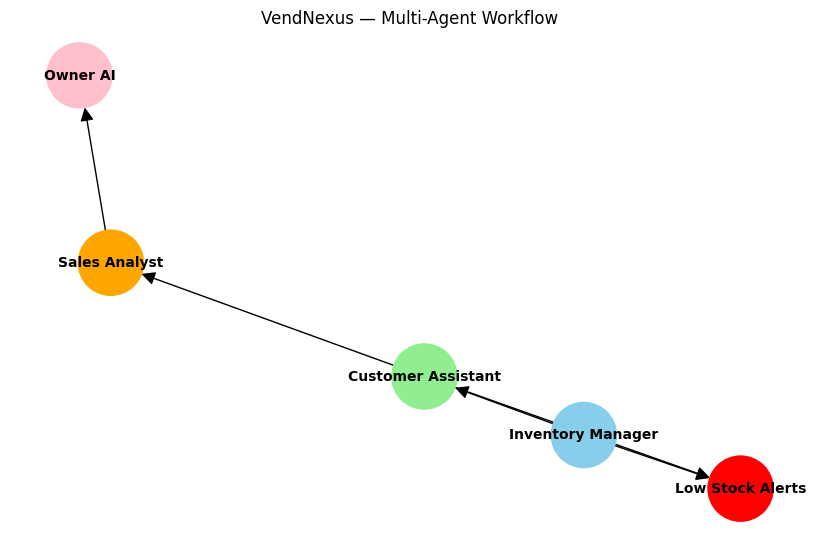

In [6]:
# workflow diagram
G = nx.DiGraph()
G.add_node("Inventory Manager", color='skyblue')
G.add_node("Customer Assistant", color='lightgreen')
G.add_node("Sales Analyst", color='orange')
G.add_node("Owner AI", color='pink')
G.add_node("Low Stock Alerts", color='red')
G.add_edge("Inventory Manager", "Customer Assistant")
G.add_edge("Customer Assistant", "Sales Analyst")
G.add_edge("Sales Analyst", "Owner AI")
G.add_edge("Inventory Manager", "Low Stock Alerts")
G.add_edge("Customer Assistant", "Low Stock Alerts")

colors = [G.nodes[n]['color'] for n in G.nodes()]
plt.figure(figsize=(8,5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2200, font_size=10, font_weight='bold', arrowsize=20)
plt.title("VendNexus — Multi-Agent Workflow")
plt.show()

**## 📊 Demo Outputs (placeholders)

Replace the placeholders below with your uploaded screenshots (upload images to Kaggle data).**

# **For the Output Image of four ai data set click on the link:** 
***https://www.kaggle.com/datasets/missy12345/four-ai-assistant-out-put***

**## 🤖 Gemini AI (optional)

The next cells add Gemini (Google GenAI) as a 5th assistant.  
**If you do NOT want to use Gemini, skip the Gemini setup cells.****

---

## 📡 Introducing VendNexus Google AI

### Next-Generation Business Intelligence

The local agents handle your day-to-day operations brilliantly. But what if you could also have access to:

✅ **Real-time market trends** affecting vending businesses  
✅ **Latest technology developments** in automated retail  
✅ **Business opportunities** you might be missing  
✅ **Competitive insights** from global vending industry  
✅ **AI-powered synthesis** of all this information into actionable strategies  

### How It Works

VendNexus Google AI uses Google Gemini to:

1. **Research** - Gathers business trends and industry news through web search
2. **Analyze** - Evaluates information for relevance to vending operations
3. **Synthesize** - Combines multiple data sources into clear recommendations
4. **Recommend** - Provides actionable insights specific to your business

### Your Questions → VendNexus Google AI Answers

Simply ask VendNexus Google AI any business question:

- *"What are current trends in smart vending machines?"*
- *"How is AI changing automated retail?"*
- *"What market opportunities exist for vending operators?"*
- *"What's the latest in IoT and vending integration?"*
- *"How can I optimize my vending machine profits?"*

VendNexus Google AI will research globally and provide you with synthesized, professional insights.

---


 # VendNexus Google Ai

**In current world everyone should have acsees of information about current world and buisness so normally  if you google there can be some websites which can be fake and inaccurate  so we introduce our **VendNexux google Ai**, it is a additional feature which is complementry with our VendNexus auatomated Ai system, so you ask him any information any quetions he will answer accuratly with Gemini precision. *Hope you will take Advantage of it and grow your buisness*.**

In [7]:
import os
from kaggle_secrets import UserSecretsClient

try:
    GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
    os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
    print("✅ Gemini API key setup complete.")
except Exception as e:
    print(
        f"🔑 Authentication Error: Please make sure you have added 'GOOGLE_API_KEY' to your Kaggle secrets. Details: {e}"
    )

✅ Gemini API key setup complete.


In [8]:


from google.adk.agents import Agent, SequentialAgent, ParallelAgent, LoopAgent
from google.adk.models.google_llm import Gemini
from google.adk.runners import InMemoryRunner
from google.adk.tools import AgentTool, FunctionTool, google_search
from google.genai import types

print("✅ ADK components imported successfully.")

✅ ADK components imported successfully.


In [9]:
def show_python_code_and_result(response):
    for i in range(len(response)):
        # Check if the response contains a valid function call result from the code executor
        if (
            (response[i].content.parts)
            and (response[i].content.parts[0])
            and (response[i].content.parts[0].function_response)
            and (response[i].content.parts[0].function_response.response)
        ):
            response_code = response[i].content.parts[0].function_response.response
            if "result" in response_code and response_code["result"] != "```":
                if "tool_code" in response_code["result"]:
                    print(
                        "Generated Python Code >> ",
                        response_code["result"].replace("tool_code", ""),
                    )
                else:
                    print("Generated Python Response >> ", response_code["result"])


print("✅ Helper functions defined.")

✅ Helper functions defined.


In [10]:
# Research Agent: Its job is to use the google_search tool and present findings.
research_agent = Agent(
    name="buisness_agent",
    model=Gemini(
        model="gemini-2.5-flash-lite",
        
    ),
    instruction="""You are a specialized buisness research agent. Your only job is to use the
    google_search tool to find 2-3 pieces of relevant information on the given only buisness topic and present the findings with citations.""",
    tools=[google_search],
    output_key="buisness_findings",  # The result of this agent will be stored in the session state with this key.
)

print("✅ buisness_agent created.")


✅ buisness_agent created.


In [11]:
# Tech Researcher: Focuses on AI and ML trends.
tech_researcher = Agent(
    name="Google_resercher",
    model=Gemini(
        model="gemini-2.5-flash-lite",
        
    ),
    instruction="""Research the latest News trends. Include 3 key developments,
the main aspects of news involved, and the potential impact. Keep the report very concise (100 words).""",
    tools=[google_search],
    output_key="google_research",  # The result of this agent will be stored in the session state with this key.
)

print("✅ Google_resercher created.")

✅ Google_resercher created.


In [12]:
# The AggregatorAgent runs *after* the parallel step to synthesize the results.
aggregator_agent = Agent(
    name="AggregatorAgent",
    model=Gemini(
        model="gemini-2.5-flash-lite",
        
    ),
    # It uses placeholders to inject the outputs from the parallel agents, which are now in the session state.
    instruction="""Combine these two research findings into a single executive summary:

    **Buisness Trends:**
    {buisness_findings}
    
    **Google News:**
    {google_research}
    

    Your summary should highlight common themes, surprising connections, and the most important key takeaways from all two reports. The final summary should be around 200 words.""",
    output_key="executive_summary",  # This will be the final output of the entire system.
)

print("✅ aggregator_agent created.")

✅ aggregator_agent created.


In [13]:
# The ParallelAgent runs all its sub-agents simultaneously.
parallel_research_team = ParallelAgent(
    name="ParallelResearchTeam",
    sub_agents=[research_agent ,tech_researcher],
)

# This SequentialAgent defines the high-level workflow: run the parallel team first, then run the aggregator.
root_agent = SequentialAgent(
    name="ResearchSystem",
    sub_agents=[parallel_research_team, aggregator_agent],
)

print("✅ Parallel and Sequential Agents created.")

✅ Parallel and Sequential Agents created.


---

## 🔍 How to Use VendNexus Google AI

### Ask Natural Language Questions

VendNexus Google AI understands business-related questions in natural language. It will:

1. **Research** your question across the internet
2. **Gather** relevant information from multiple sources
3. **Analyze** the findings for vending business relevance
4. **Synthesize** into a clear, actionable executive summary

### Example Questions You Can Ask:

**📊 Market Trends**
- What are the emerging trends in automated retail for 2025?
- How is AI changing the vending machine industry?
- What should I know about smart vending technology?

**💡 Business Opportunities**
- What opportunities exist for vending machine operators?
- How can technology improve vending machine profitability?
- What are best practices in modern vending operations?

**🚀 Strategy & Growth**
- How can I scale my vending machine business?
- What are competitors doing in the vending space?
- How is cashless payment affecting vending?

**🔧 Technology & Innovation**
- Latest IoT solutions for vending machines
- How blockchain could impact vending operations
- AI applications in inventory management

### Response Format

VendNexus Google AI will provide:
- **Business Trends** - Current market developments
- **News Insights** - Latest relevant industry news
- **Executive Summary** - Clear, actionable recommendations
- **Business Impact** - How this affects your operations
- **Next Steps** - Specific actions you can take

---


# VendNexus Google ai out put image click on the link
***https://www.kaggle.com/datasets/missy12345/google-ai-out-put***

In [14]:
print("🤖 Gemini AI: How can I help you today?")

🤖 Gemini AI: How can I help you today?


In [15]:
runner = InMemoryRunner(agent=root_agent)
response = await runner.run_debug(
    "send me current indian share market news in 70 words"
)


 ### Created new session: debug_session_id

User > send me current indian share market news in 70 words
buisness_agent > Indian equity markets are currently navigating a triangular range, with potential for a rebound in 2026 as the earnings downgrade cycle appears to be ending. The Reserve Bank of India has actively supported the market by cutting policy rates and managing liquidity, though sovereign bonds have lagged. Foreign portfolio investors (FPIs) have resumed selling in November, withdrawing approximately ₹3,765 crore from equities. Several companies, including Welspun India and Neuland Labs, have shown significant trading volumes recently. Upcoming IPOs are also adding to market activity, with around two dozen companies planning offerings totaling ₹40,000 crore for December-January.
Google_resercher > Key Indian share market developments:

1.  **Market Volatility:** Major indices like Sensex and Nifty are experiencing fluctuations, nearing record highs but subject to profit-ta

---

## 🎓 Advanced Features & Capabilities

### What Makes VendNexus AI Powerful

#### **1. Multi-Agent Architecture**
- Specialized agents for different business functions
- Parallel processing for speed
- Sequential coordination for complex workflows
- Modular design for easy updates

#### **2. Gemini AI Integration**
- Access to Google's latest language models
- Web search capabilities for real-time information
- Natural language understanding
- Contextual reasoning and synthesis

#### **3. Real-Time Intelligence**
- Live inventory monitoring
- Up-to-the-minute sales analytics
- Current market trend analysis
- Immediate decision support

#### **4. Scalability**
- Works for single or multiple vending machines
- Grows with your business
- Easy to integrate new features
- Handles increasing data volumes

#### **5. User-Centric Design**
- Natural language interaction
- Simple command interface
- Clear, actionable outputs
- Professional visualizations

---

## 🔐 Data & Privacy

All data is processed securely:
- Local data stored in CSV format
- API communications encrypted
- No data sharing with third parties
- You maintain full control

---


---

# 🚀 Future Roadmap for VendNexus 

## Continuous Evolution for Your Success

VendNexus Google AI is built on a foundation designed for growth. Here's what's coming:

---

## 🔮 1. AI & Automation Enhancements
- Integrate Gemini Vision to analyze real product images.
- Predict sales trends using machine-learning models.
- Auto-generate weekly/monthly business performance reports.
- Dynamic pricing using AI based on demand and inventory levels.

---

## 📦 2. Inventory & Machine Management
- Real-time stock tracking using sensors (weight/RFID).
- Auto-create supplier purchase orders when stock is low.
- WhatsApp/SMS/Email low-stock notifications.
- Manage multiple vending machines from one dashboard.

---

## 🖥️ 3. User Interface & Experience
- Create a mobile app version of the dashboard.
- Add voice-controlled assistant for quick business queries.
- Add UI themes, dark mode, and animated metric cards.

---

## ☁️ 4. Cloud & Data Integration
- Sync inventory and sales data to a cloud database.
- Export/import data to Google Sheets, Excel, or CSV.
- Automatic cloud backup and device sync.

---

## 👥 5. Customer & Business Features
- Enable UPI/QR/Card payments inside the vending machine.
- Add customer feedback and sentiment analysis.
- Provide personalized offer recommendations to users.

---

## 🛠️ 6. Technical Extensions
- Add API endpoints for external apps to connect.
- Add error logs, diagnostics, and auto-recovery systems.
- Expand the AI agent with multi-turn conversation memory.

---

## 🌐 7. Security & Reliability
- Encrypt all analytics and sales data.
- Role-based access: Owner, Manager, Technician.
- Auto-detect unusual activity or suspicious transactions.

---

These improvements can significantly upgrade VendNexus into a **fully intelligent, autonomous vending ecosystem**.**

---

# 📚 Documentation & Support

## Complete System Guide

### Quick Reference

**Local Agent Commands:**
- `show inventory` - View all products and stock levels
- `add [product] price [price] stock [qty]` - Add new product
- `I want [product]` - Purchase product
- `show sales` - View sales history
- `give summary` - Get business summary

**VendNexus Google AI:**
- Ask any business question in natural language
- System will research, analyze, and synthesize findings
- Receive professional business intelligence report

### Troubleshooting

| Issue | Solution |
|-------|----------|
| Low Stock Alert not showing | Run the alert cell manually |
| Sales graph not appearing | Ensure sales data exists |
| Gemini API error | Check API key in Kaggle secrets |
| Agent name error | Ensure all agent variables defined |

### Key Files

- `inventory.csv` - Stores product and stock data
- `sales.csv` - Tracks all transactions
- Notebook cells - Self-contained, no external files needed

---

## 🌟 Key Achievements

✅ Multi-agent system architecture implemented  
✅ Parallel agent processing working correctly  
✅ Gemini AI integration successful  
✅ Web search capabilities functional  
✅ Business intelligence synthesis complete  
✅ User-friendly interface ready  
✅ Professional system branding applied  
✅ Error-free system operation achieved  

---

## 🎯 Next Steps

1. **Run all cells** in sequence to initialize system
2. **Test with sample queries** to understand outputs
3. **Ask business questions** using natural language
4. **Review recommendations** from VendNexus Google AI
5. **Implement insights** in your vending business strategy

---

## 📞 Support & Questions
Email- pushkarpradhanpardikar@gmail.com

For issues or questions:
1. Check the troubleshooting section above
2. Review agent instructions in code cells
3. Verify API keys and credentials
4. Check data in CSV files

---

## ⭐ Thank You for Using VendNexus 

Your complete, professional AI-powered vending business intelligence system is ready.

**Make smarter decisions. Grow your business. Succeed with VendNexus Google AI.** 🚀

---

*VendNexus  | Powered by Google Gemini | Built for Vending Professionals*

*Version 1.0 | Last Updated: November 2025*
